Saving download (5).jpeg to download (5) (3).jpeg


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


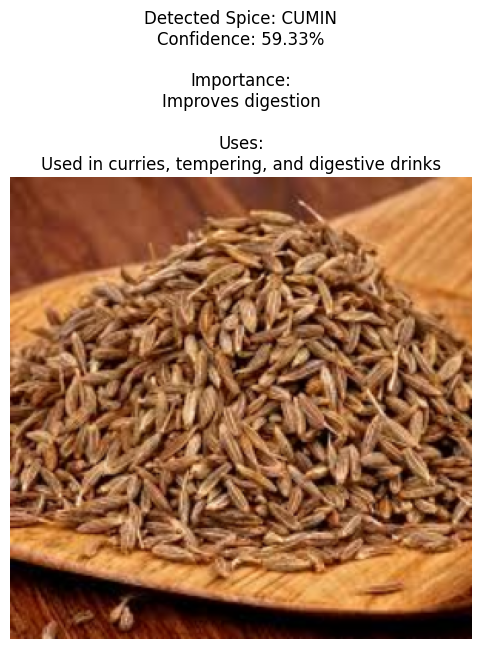

In [ ]:
import cv2
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# --------------------------------------------------
# 1. TRAIN ML MODEL (SIMULATED SPICE DATA)
# --------------------------------------------------

def generate_sample(spice):
    if spice == "turmeric":
        return [30,25,200,150,30,"turmeric"]
    if spice == "black_pepper":
        return [20,25,50,50,50,"black_pepper"]
    if spice == "cumin":
        return [25,25,120,80,40,"cumin"]
    if spice == "cardamom":
        return [15,25,180,200,120,"cardamom"]
    if spice == "ginger":
        return [40,25,160,140,100,"ginger"]
    if spice == "cinnamon":
        return [10,25,120,70,40,"cinnamon"]

data=[]
for _ in range(300):
    for s in ["turmeric","black_pepper","cumin","cardamom","ginger","cinnamon"]:
        data.append(generate_sample(s))

df=pd.DataFrame(data,columns=[
    "weight","temp","r","g","b","label"
])

X=df.drop("label",axis=1)
y=df["label"]

le=LabelEncoder()
y=le.fit_transform(y)

model=RandomForestClassifier(n_estimators=150)
model.fit(X,y)

# --------------------------------------------------
# 2. IMAGE UPLOAD (WEBCAM SUBSTITUTE)
# --------------------------------------------------

uploaded=files.upload()
img=cv2.imread(list(uploaded.keys())[0])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(300,300))

# --------------------------------------------------
# 3. COLOR SENSOR (RGB)
# --------------------------------------------------

avg_color=img.mean(axis=(0,1))
r,g,b=avg_color

# --------------------------------------------------
# 4. SIMULATED WEIGHT SENSOR
# --------------------------------------------------

weight = random.uniform(10,50)
temp = 25

input_data=np.array([[weight,temp,r,g,b]])

# --------------------------------------------------
# 5. PREDICTION
# --------------------------------------------------

probs=model.predict_proba(input_data)[0]
pred=model.predict(input_data)[0]

spice=le.inverse_transform([pred])[0]
confidence=max(probs)*100

# --------------------------------------------------
# 6. SPICE IMPORTANCE AND USES
# --------------------------------------------------

spice_info = {
    "turmeric": {
        "importance": "Healing and immunity booster",
        "uses": "Used in cooking, medicines, and wound healing"
    },
    "black_pepper": {
        "importance": "Relieves cold and cough",
        "uses": "Used in soups, medicines, and seasoning"
    },
    "cumin": {
        "importance": "Improves digestion",
        "uses": "Used in curries, tempering, and digestive drinks"
    },
    "cardamom": {
        "importance": "Improves aroma and freshness",
        "uses": "Used in sweets, tea, and mouth fresheners"
    },
    "ginger": {
        "importance": "Reduces nausea and improves digestion",
        "uses": "Used in tea, curries, and home remedies"
    },
    "cinnamon": {
        "importance": "Controls blood sugar and adds flavor",
        "uses": "Used in sweets, tea, and spice mixes"
    }
}

importance_text = spice_info[spice]["importance"]
uses_text = spice_info[spice]["uses"]

# --------------------------------------------------
# 7. DASHBOARD DISPLAY
# --------------------------------------------------

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.title(
    f"Detected Spice: {spice.replace('_',' ').upper()}\n"
    f"Confidence: {confidence:.2f}%\n\n"
    f"Importance:\n{importance_text}\n\n"
    f"Uses:\n{uses_text}",
    fontsize=12
)
plt.show()
